In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import zipfile

# Path to the zip file and where to extract
zip_path = '/content/drive/MyDrive/pp.zip'
extract_to = '/content/drive/MyDrive/stress_data'

# Unzipping
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Unzipped to:", extract_to)

Unzipped to: /content/drive/MyDrive/stress_data


In [ ]:
import os
os.listdir(extract_to)


NameError: name 'extract_to' is not defined

In [2]:
import pandas as pd

csv_path = '/content/drive/MyDrive/stress_data/merged_data.csv'
df = pd.read_csv(csv_path)
df.head()


<ipython-input-2-3f7bc91404c8>:4: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)


,X,Y,Z,EDA,HR,TEMP,id,datetime,label
0,-13.0,-61.0,5.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.000000000,2.0
1,-20.0,-69.0,-3.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.031249920,2.0
2,-31.0,-78.0,-15.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.062500096,2.0
3,-47.0,-65.0,-38.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.093750016,2.0
4,-67.0,-57.0,-53.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.124999936,2.0


In [ ]:
df.shape

(11509051, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11509051 entries, 0 to 11509050
Data columns (total 9 columns):
 #   Column    Dtype  
---  ------    -----  
 0   X         float64
 1   Y         float64
 2   Z         float64
 3   EDA       float64
 4   HR        float64
 5   TEMP      float64
 6   id        object 
 7   datetime  object 
 8   label     float64
dtypes: float64(7), object(2)
memory usage: 790.3+ MB


In [ ]:
df.isnull().sum()

,0
X,0
Y,0
Z,0
EDA,0
HR,0
TEMP,0
id,0
datetime,0
label,0


In [ ]:
df.describe()

,X,Y,Z,EDA,HR,TEMP,label
count,1.150905e+07,1.150905e+07,1.150905e+07,1.150905e+07,1.150905e+07,1.150905e+07,1.150905e+07
mean,-2.823775e+01,-9.091032e-01,2.382449e+01,3.502127e+00,8.576090e+01,3.223435e+01,1.554202e+00
std,3.142310e+01,3.343382e+01,2.985317e+01,5.656541e+00,1.419642e+01,2.260516e+00,7.891827e-01
min,-1.280000e+02,-1.280000e+02,-1.280000e+02,0.000000e+00,5.100000e+01,2.409000e+01,0.000000e+00
25%,-5.200000e+01,-1.900000e+01,4.000000e+00,2.242060e-01,7.672000e+01,3.019000e+01,1.000000e+00
50%,-3.300000e+01,1.000000e+00,2.500000e+01,1.157407e+00,8.390000e+01,3.257000e+01,2.000000e+00
75%,-1.400000e+01,1.700000e+01,4.900000e+01,4.077436e+00,9.310000e+01,3.425000e+01,2.000000e+00
max,1.270000e+02,1.270000e+02,1.270000e+02,5.976071e+01,1.802300e+02,3.659000e+01,2.000000e+00


In [ ]:
df.columns

Index(['X', 'Y', 'Z', 'EDA', 'HR', 'TEMP', 'id', 'datetime', 'label'], dtype='object')

In [ ]:
# Loop through all columns and print unique values
for column in df.columns:
    unique_vals = df[column].unique()
    print(f"{column} (Data type: {df[column].dtype})")
    print(f"Number of unique values: {len(unique_vals)}")
    print(f"Sample options: {unique_vals[:10]}")  # Shows first 10 unique values only
    print("-" * 40)

X (Data type: float64)
Number of unique values: 256
Sample options: [-13. -20. -31. -47. -67.  -9.   9.  -6.  -1. -41.]
----------------------------------------
Y (Data type: float64)
Number of unique values: 256
Sample options: [-61. -69. -78. -65. -57. -68. -74. -63. -73. -71.]
----------------------------------------
Z (Data type: float64)
Number of unique values: 256
Sample options: [  5.  -3. -15. -38. -53. -32.  -2.  17. -19. -37.]
----------------------------------------
EDA (Data type: float64)
Number of unique values: 274452
Sample options: [6.769995 6.805877 6.789217 6.752054 6.854573 6.828943 6.907114 6.781528
 6.798188 6.422712]
----------------------------------------
HR (Data type: float64)
Number of unique values: 6268
Sample options: [ 99.43  99.72 100.   100.32 100.62 101.02 101.32 101.65 102.02 102.37]
----------------------------------------
TEMP (Data type: float64)
Number of unique values: 599
Sample options: [31.17 31.21 31.35 31.19 31.23 31.27 31.33 31.29 31.31 3

In [ ]:
df.label.value_counts()

,count
label,
2.0,8540583
0.0,2162246
1.0,806222


In [ ]:
df.drop(columns=['id'],axis=1)
df

,X,Y,Z,EDA,HR,TEMP,id,datetime,label
0,-13.0,-61.0,5.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.000000000,2.0
1,-20.0,-69.0,-3.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.031249920,2.0
2,-31.0,-78.0,-15.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.062500096,2.0
3,-47.0,-65.0,-38.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.093750016,2.0
4,-67.0,-57.0,-53.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.124999936,2.0
...,...,...,...,...,...,...,...,...,...
11509046,-16.0,-56.0,24.0,3.386070,88.37,33.77,F5,2020-07-23 17:28:59.875000064,2.0
11509047,-8.0,-50.0,27.0,3.386070,88.37,33.77,F5,2020-07-23 17:28:59.906249984,2.0
11509048,-28.0,-36.0,28.0,3.386070,88.37,33.77,F5,2020-07-23 17:28:59.937499904,2.0
11509049,-29.0,-29.0,30.0,3.386070,88.37,33.77,F5,2020-07-23 17:28:59.968750080,2.0


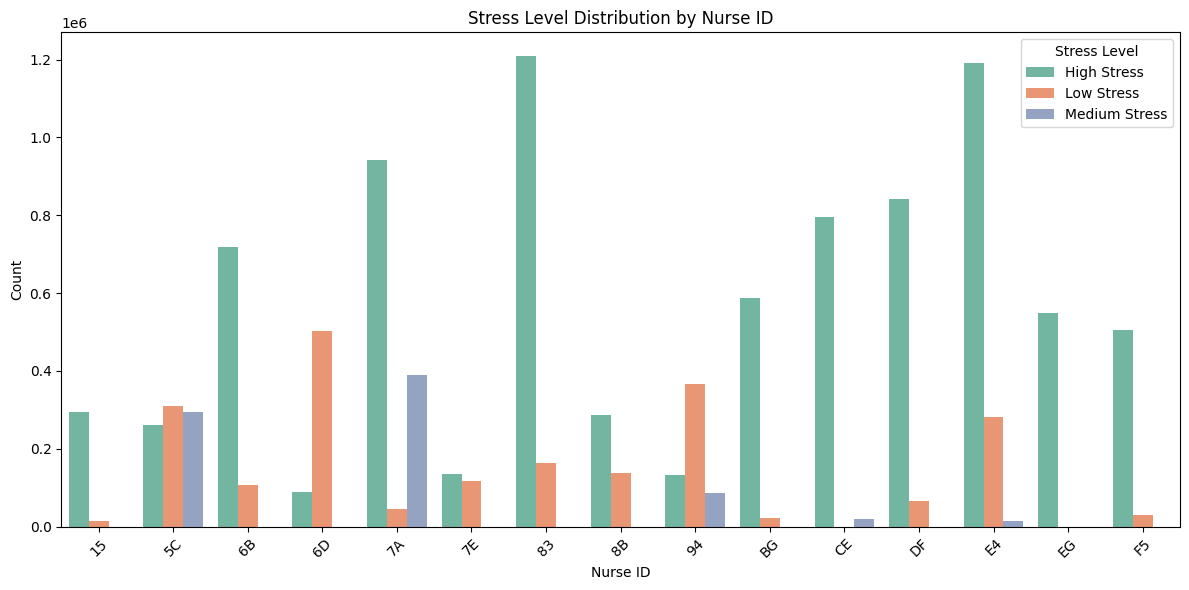

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='id', hue='label_str', palette='Set2')
plt.title("Stress Level Distribution by Nurse ID")
plt.xlabel("Nurse ID")
plt.ylabel("Count")
plt.legend(title="Stress Level")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

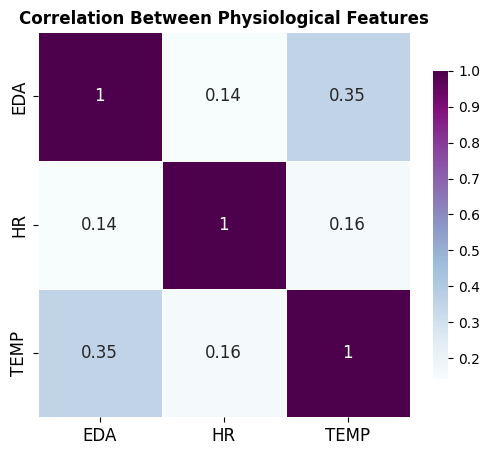

In [ ]:

plt.figure(figsize=(6,5))

sns.heatmap(df[['EDA', 'HR', 'TEMP']].corr(),
            annot=True,
            cmap='BuPu',
            annot_kws={"size": 12},
            linewidths=0.4,
            linecolor='white',
            cbar_kws={"shrink": 0.8})

plt.title("Correlation Between Physiological Features", fontsize=12, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [3]:

# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, classification_report, confusion_matrix
)

In [4]:
# Preprocessing
df['datetime'] = pd.to_datetime(df['datetime'])
df['label_str'] = df['label'].map({0: 'Low Stress', 1: 'Medium Stress', 2: 'High Stress'})

In [5]:

# Encode labels
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label_str'])

In [6]:
# Drop irrelevant columns
df_model = df.drop(columns=['label', 'label_str', 'id', 'datetime'])

In [7]:
# Split data into features and target
X = df_model.drop(columns=['label_encoded'])
y = df_model['label_encoded']

# Train-test split BEFORE resampling
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [8]:

# Combine for resampling only training set
train_df = pd.concat([X_train, y_train], axis=1)

low = train_df[train_df['label_encoded'] == 1]   # Low
med = train_df[train_df['label_encoded'] == 2]   # Medium
high = train_df[train_df['label_encoded'] == 0]  # High

# Use the smallest class size as target count
target_count = min(len(low), len(med), len(high))

low_resampled = resample(low, replace=False, n_samples=target_count, random_state=42)
med_resampled = resample(med, replace=True, n_samples=target_count, random_state=42)
high_resampled = resample(high, replace=False, n_samples=target_count, random_state=42)

# Combine balanced training set
train_balanced = pd.concat([low_resampled, med_resampled, high_resampled])

In [9]:

X_train_bal = train_balanced.drop(columns=['label_encoded'])
y_train_bal = train_balanced['label_encoded']

<ipython-input-17-b5078db3fc67>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=y_labels, palette='pastel')


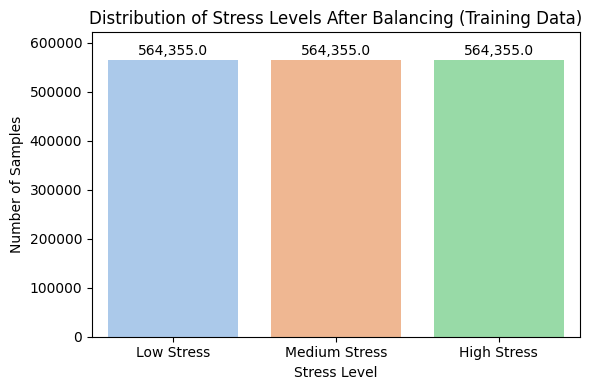

In [17]:
label_map = {0: 'High Stress', 1: 'Low Stress', 2: 'Medium Stress'}
y_labels = pd.Series(y_train_bal).map(label_map)

plt.figure(figsize=(6, 4))
ax = sns.countplot(x=y_labels, palette='pastel')
plt.title("Distribution of Stress Levels After Balancing (Training Data)")
plt.xlabel("Stress Level")
plt.ylabel("Number of Samples")
plt.ylim(0, y_labels.value_counts().max() * 1.1)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 10000, f'{height:,}', ha="center", fontsize=10)

plt.tight_layout()
plt.show()


In [10]:
# Evaluation function
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    print(f"\n{model_name} Classification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=le.classes_,
                yticklabels=le.classes_)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.tight_layout()
    plt.show()

# ***Train and evaluate models***




***1-Decision Tree***


Decision Tree Classification Report:
               precision    recall  f1-score   support

  High Stress       0.99      0.97      0.98   2562175
   Low Stress       0.92      0.98      0.95    648674
Medium Stress       0.87      0.98      0.92    241867

     accuracy                           0.97   3452716
    macro avg       0.93      0.97      0.95   3452716
 weighted avg       0.97      0.97      0.97   3452716



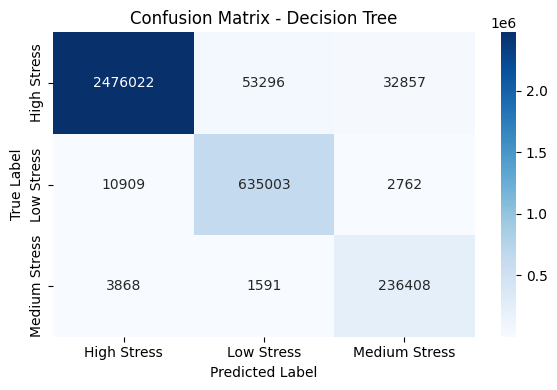

In [11]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_bal, y_train_bal)
evaluate_model(dt, X_test, y_test, "Decision Tree")

***2- Random Forest***


Random Forest Classification Report:
               precision    recall  f1-score   support

  High Stress       1.00      0.99      0.99   2562175
   Low Stress       0.97      0.99      0.98    648674
Medium Stress       0.94      0.99      0.97    241867

     accuracy                           0.99   3452716
    macro avg       0.97      0.99      0.98   3452716
 weighted avg       0.99      0.99      0.99   3452716



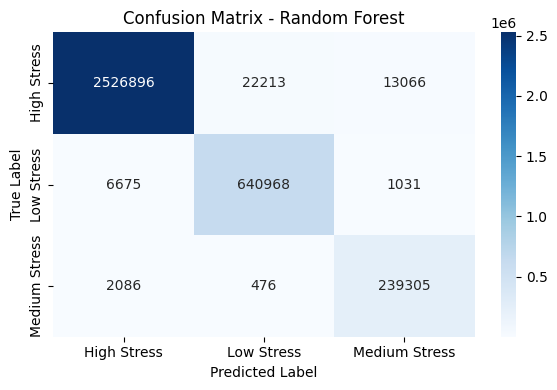

In [18]:

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_bal, y_train_bal)
evaluate_model(rf, X_test, y_test, "Random Forest")

***3- XGBoost Model***

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:08:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Classification Report:
               precision    recall  f1-score   support

  High Stress       0.97      0.84      0.90   2562175
   Low Stress       0.71      0.87      0.78    648674
Medium Stress       0.50      0.91      0.65    241867

     accuracy                           0.85   3452716
    macro avg       0.73      0.87      0.78   3452716
 weighted avg       0.89      0.85      0.86   3452716



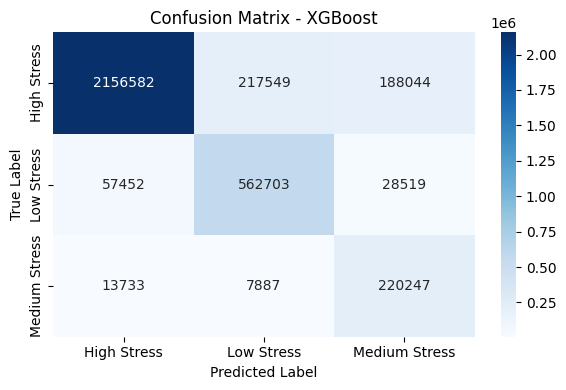

In [12]:
!pip install xgboost
import xgboost as xgb
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)
xgb_model.fit(X_train_bal, y_train_bal)
evaluate_model(xgb_model, X_test, y_test, "XGBoost")

***4-Naive Bayes***


Naive Bayes Classification Report:
               precision    recall  f1-score   support

  High Stress       0.81      0.45      0.58   2562175
   Low Stress       0.29      0.45      0.35    648674
Medium Stress       0.10      0.42      0.16    241867

     accuracy                           0.45   3452716
    macro avg       0.40      0.44      0.36   3452716
 weighted avg       0.66      0.45      0.51   3452716



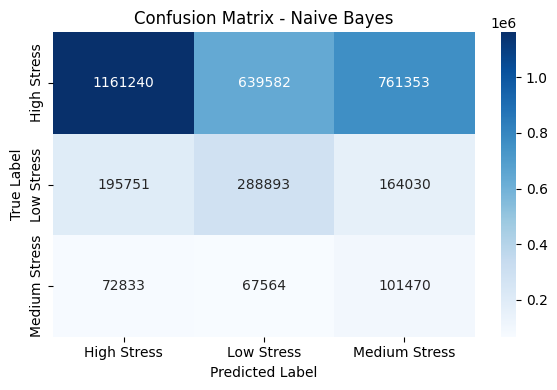

In [13]:
nb = GaussianNB()
nb.fit(X_train_bal, y_train_bal)
evaluate_model(nb, X_test, y_test, "Naive Bayes")


***5- CatBoost Model***

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 19.5 MB/s eta 0:00:00

CatBoost Classification Report:
               precision    recall  f1-score   support

  High Stress       0.92      0.73      0.81   2562175
   Low Stress       0.56      0.70      0.62    648674
Medium Stress       0.31      0.78      0.44    241867

     accuracy                           0.73   3452716
    macro avg       0.60      0.74      0.63   3452716
 weighted avg       0.81      0.73      0.75   3452716



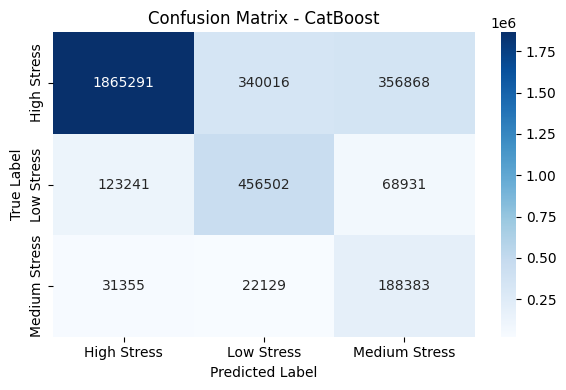

In [14]:
!pip install catboost
from catboost import CatBoostClassifier

# Initialize and train CatBoost
cat_model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=6,
    loss_function='MultiClass',
    verbose=False,
    random_state=42
)

cat_model.fit(X_train_bal, y_train_bal)
evaluate_model(cat_model, X_test, y_test, "CatBoost")


<ipython-input-15-7e5ec706600c>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Model", y="Accuracy", data=results_df, palette="pastel")


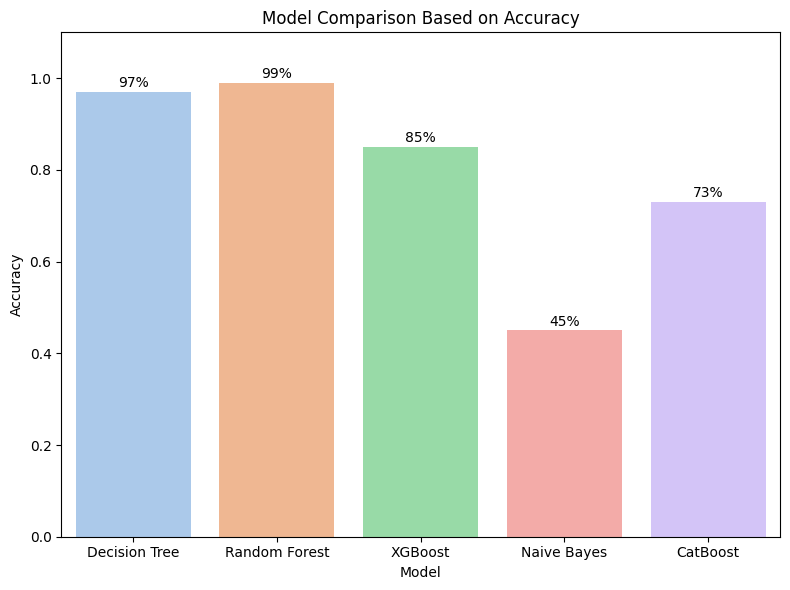

In [15]:

import seaborn as sns
results_df = pd.DataFrame([
    {"Model": "Decision Tree", "Accuracy": 0.97},
    {"Model": "Random Forest", "Accuracy": 0.99},
    {"Model": "XGBoost", "Accuracy": 0.85},
    {"Model": "Naive Bayes", "Accuracy": 0.45},
    {"Model": "CatBoost", "Accuracy": 0.73}
])

plt.figure(figsize=(8, 6))
ax = sns.barplot(x="Model", y="Accuracy", data=results_df, palette="pastel")

plt.title("Model Comparison Based on Accuracy")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1.1)

for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,
        height + 0.01,
        f'{height:.0%}',
        ha="center",
        fontsize=10
    )

plt.tight_layout()
plt.show()
